Population analysis taking into consideration all of the data gathered during week 1

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model

from os import listdir
from os.path import isfile, join

from dataLoader import load_data_event
from statUtils import perform_regression

In [3]:
# get list of all events that are downloaded
data_dir = "data/"
saved_data_files = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]
events = [i[:-5] for i in saved_data_files]
events

['2020wasno',
 '2020txgre',
 '2020txdri',
 '2020miket',
 '2020orore',
 '2020scmb',
 '2020caln',
 '2020vahay',
 '2020mitvc',
 '2020mimcc',
 '2020gagai',
 '2020isde2',
 '2020pahat',
 '2020ctnct',
 '2020ncwak',
 '2020isde1',
 '2020misou',
 '2020ndgf',
 '2020onosh',
 '2020ohmv',
 '2020nhgrs',
 '2020mxmo',
 '2020mokc']

In [4]:
# load into dataframes
qualification_matches, team_scores, team_data, team_component_opr = load_data_event(events[0])
for event in events[1:]:
    event_qualification_matches, event_team_scores, event_team_data, event_team_component_opr = load_data_event(event)
    qualification_matches = pd.concat([qualification_matches, event_qualification_matches])
    team_scores = pd.concat([team_scores, event_team_scores])
    team_data = pd.concat([team_data, event_team_data])
    team_component_opr = pd.concat([team_component_opr, event_team_component_opr])
qualification_matches

,match_key,match_type,match_number,blue_1_key,blue_2_key,blue_3_key,blue_keys,blue_endgame_level,blue_foul_count,blue_points_scored,...,red_3_init_line,red_1_endgame,red_2_endgame,red_3_endgame,red_cells_bottom_auto,red_cells_bottom_teleop,red_cells_outer_auto,red_cells_outer_teleop,red_cells_inner_auto,red_cells_inner_teleop
11,2020wasno_qm1,qm,1,frc1318,frc4089,frc8059,"[frc1318, frc4089, frc8059]",False,0,69,...,0,5,5,5,1,0,0,0,0,0
12,2020wasno_qm10,qm,10,frc7461,frc2412,frc4513,"[frc7461, frc2412, frc4513]",False,0,35,...,0,5,25,0,0,0,2,4,1,1
13,2020wasno_qm11,qm,11,frc2522,frc2976,frc3070,"[frc2522, frc2976, frc3070]",False,1,91,...,5,0,5,5,0,0,2,2,1,0
14,2020wasno_qm12,qm,12,frc4911,frc2903,frc4173,"[frc4911, frc2903, frc4173]",False,0,44,...,5,25,5,5,0,1,0,3,0,0
15,2020wasno_qm13,qm,13,frc949,frc4309,frc4180,"[frc949, frc4309, frc4180]",True,0,57,...,0,5,5,5,0,2,0,14,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020mokc_qm70,qm,70,frc1806,frc5119,frc1764,"[frc1806, frc5119, frc1764]",False,0,127,...,5,25,25,25,0,0,7,24,4,8
79,2020mokc_qm71,qm,71,frc5268,frc1847,frc1710,"[frc5268, frc1847, frc1710]",True,0,84,...,5,0,25,25,0,0,6,11,3,9
80,2020mokc_qm72,qm,72,frc5141,frc525,frc1982,"[frc5141, frc525, frc1982]",False,3,113,...,5,25,5,25,0,0,4,13,1,0
81,2020mokc_qm8,qm,8,frc1810,frc3928,frc1986,"[frc1810, frc3928, frc1986]",False,0,91,...,5,25,5,5,0,0,3,5,0,0


In [5]:
# save dataframes so that we don't have to recalculate component OPR
qualification_matches.to_csv('data/saved_dataframes/week-1-qualification-matches.csv')
team_scores.to_csv('data/saved_dataframes/week-1-team-scores.csv')
team_data.to_csv('data/saved_dataframes/week-1-team-data.csv')
team_component_opr.to_csv('data/saved_dataframes/week-1-team-component-opr.csv')

In [6]:
# and for future me, just load them here
qualification_matches = pd.read_csv('data/saved_dataframes/week-1-qualification-matches.csv')
team_scores = pd.read_csv('data/saved_dataframes/week-1-team-scores.csv')
team_data = pd.read_csv('data/saved_dataframes/week-1-team-data.csv')
team_component_opr = pd.read_csv('data/saved_dataframes/week-1-team-component-opr.csv')

In [7]:
# normalize component OPRs
team_component_opr_normalized = team_component_opr.copy(deep=True)
team_component_opr_normalized['cells_bottom_auto'] *= 2
team_component_opr_normalized['cells_bottom_teleop'] *= 1
team_component_opr_normalized['cells_inner_auto'] *= 6
team_component_opr_normalized['cells_inner_teleop'] *= 3
team_component_opr_normalized['cells_outer_auto'] *= 4
team_component_opr_normalized['cells_outer_teleop'] *= 2

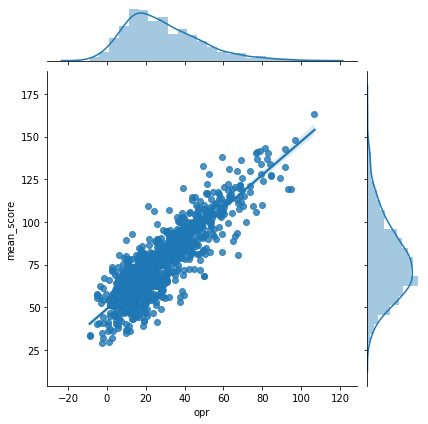

In [8]:
# joint plot opr/team scores
# this is some thicc data
sns.jointplot('opr', 'mean_score', data=team_data, kind='reg')

In [19]:
# regression of component OPRs and endgame
full_features = ['cells_bottom_auto', 'cells_bottom_teleop', 'cells_inner_auto', 'cells_inner_teleop', 'cells_outer_auto', 'cells_outer_teleop', 'mean_endgame']
full_feature_regression, r2 = perform_regression(team_component_opr_normalized, full_features, 'mean_score')

print(f"R^2: {r2}")

reg_coef = {f: full_feature_regression.coef_[i] for i, f in enumerate(full_features)}
reg_coef = {k: v for k, v in sorted(reg_coef.items(), key=lambda i: i[1])}
reg_coef

R^2: 0.7387024042471557


{'cells_inner_teleop': 0.9639319202324121,
 'mean_endgame': 1.0379562613023137,
 'cells_outer_teleop': 1.2185754894548009,
 'cells_bottom_teleop': 1.268596028925358,
 'cells_outer_auto': 1.2739286819811202,
 'cells_inner_auto': 1.2771172093322143,
 'cells_bottom_auto': 2.3747821998862113}

This multidimensional regression doesn't really show _that_ much of a relation, but there's still some useable info from it -- as per usual, in order of importance (when I ran this):
- cells_inner_teleop (1.0)
- mean_endgame (1.0)
- cells_outer_teleop (1.2)
- cells_bottom_teleop (1.3)
- cells_outer_auto (1.3)
- cells_inner_auto (1.3)
- cells_bottom_auto (2.4)

Note that this is with normalized values, so the coefs coorelate to the impact

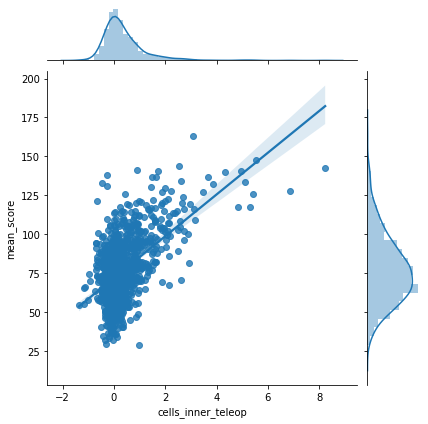

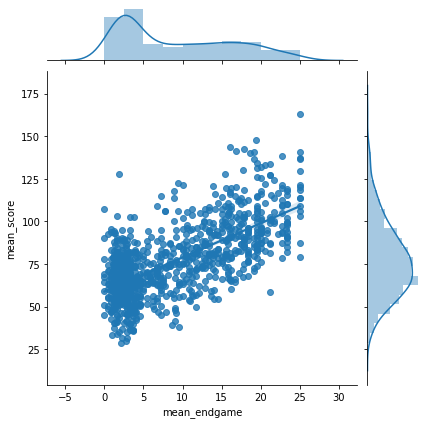

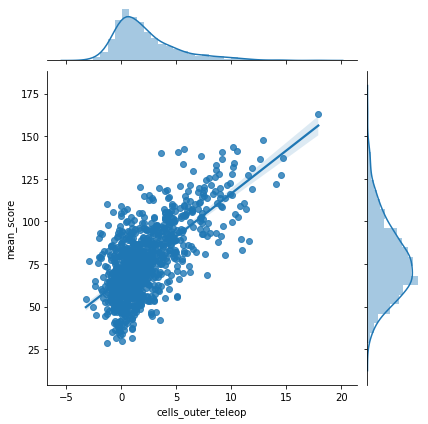

In [16]:
sns.jointplot('cells_inner_teleop', 'mean_score', data=team_component_opr, kind='reg')
sns.jointplot('mean_endgame', 'mean_score', data=team_component_opr, kind='reg')
sns.jointplot('cells_outer_teleop', 'mean_score', data=team_component_opr, kind='reg')

It also looks like auto scoring isn't that important when taking the endgame score into consideration, so let's try a model that ignores that.

In [17]:
# regression of component OPRs and endgame (w/out auto)
features = ['cells_bottom_teleop', 'cells_inner_teleop', 'cells_outer_teleop', 'mean_endgame']
reg, r2 = perform_regression(team_component_opr_normalized, features, 'mean_score')

print(f"R^2: {r2}")

reg_coef = {f: reg.coef_[i] for i, f in enumerate(features)}
reg_coef = {k: v for k, v in sorted(reg_coef.items(), key=lambda i: i[1])}
reg_coef

R^2: 0.6901383003230186


{'cells_bottom_teleop': 1.2679105439484355,
 'mean_endgame': 1.29661996276871,
 'cells_inner_teleop': 1.5059815227272,
 'cells_outer_teleop': 1.6339312884953114}

And that didn't work (in that R^2 didn't go up ). So auto is important to the score. What a surprise :P

Moving on, let's attempt to predict match scores for alliances

In [34]:
def predict_alliance(alliance_keys):
    bot_features = [
        [team_component_opr_normalized.loc[team_component_opr_normalized['team_key'] == team_key].iloc[0][i] for i in full_features] for team_key in alliance_keys
    ]

    predictions = full_feature_regression.predict(bot_features)

    alliance_prediction = np.mean(predictions)
    return alliance_prediction

predict_alliance(['frc5160', 'frc5511', 'frc7763'])

85.43374344640603